# ExoLSTM: Sample Run for final Dataset

# Import necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("/home/mohsen/projects/exosomians-v2/")
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [3]:
import exopy as exo
import scanpy as sc
import numpy as np
import pandas as pd

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data setup

In [4]:
exo.ml.ExoLSTM.setup_dataset('./data/design.mat.csv', seq_key='seq', 
                            target_key='label')

Successfully loaded the dataset with 175959 sequences!


# Model Instatiation

In [5]:
config = {
    'activation_fn': 'tanh', 
    'batch_size': 32, 
    'bidirectional': False, 
    'dropout_rate': 0.2, 
    'lr': 0.0001354375762754227, 
    'n_head_hidden': 64, 
    'n_head_layers': 2, 
    'n_hidden': 1024, 
    'n_layers': 1, 
    'network': 'exolstm', 
    'use_batch_norm': False, 
    'use_layer_norm': False
}

In [6]:
network = exo.ml.ExoLSTM(**config)

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [ ]:
network.fit(max_epochs=1000,
            batch_size=32, 
            early_stopping_patience=3,
            train_size=0.8, 
            check_val_every_n_epoch=1,
            save_path='./saved_models/ExoLSTM/')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory /home/mohsen/projects/exosomians-v2/saved_models/ExoLSTM exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name            | Type              | Params
------------------------------------------------------
0 | input_embedding | Embedding         | 64    
1 | rnn             | RNNCell           | 4.2 M 
2 | head            | MLP               | 69.8 K
3 | loss            | BCEWithLogitsLoss | 0     
------------------------------------------------------
4.3 M     Trainable params
64        Non-trainable params
4.3 M     Total params
17.221    Total estimated model params size (MB)


Epoch 0:   6%|███▋                                                             | 310/5499 [00:12<03:27, 25.05it/s, loss=1.03, v_num=3]

/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Epoch 0:  80%|██████████████████████████████████████████████████▎            | 4390/5499 [02:31<00:38, 28.94it/s, loss=0.659, v_num=3]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0: 100%|████████████████████████████████████████████████████████████████████| 1100/1100 [00:34<00:00, 33.71it/s]
Epoch 0: 100%|█| 5499/5499 [03:07<00:00, 29.39it/s, loss=0.722, v_num=3, val_auroc=0.868, val_precision=0.588, val_recall=0.656, val_s
Epoch 1:  80%|▊| 4390/5499 [02:29<00:37, 29.41it/s, loss=0.693, v_num=3, val_auroc=0.868, val_precision=0.588, val_recall=0.656, val_s
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                                                            | 0/1100 [00:00<?, ?it/s]
Epoch 1:  80%|▊| 4400/5499 [02:30<00:37, 29.29it/s, loss=0.693, v_num=3, val_auroc=0.868, val_precision=0.588, val_recall=0.656, val_s
Validation DataLoader 0:   1%|▋                                                                     | 10/1100 [00:00<00:27, 39.5

In [9]:
emb_adata = network.get_embeddings(batch_size=1024)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [01:00<00:00,  2.84it/s]


In [10]:
sc.pp.neighbors(emb_adata)
sc.tl.umap(emb_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [11]:
emb_adata.write_h5ad('./saved_models/ExoLSTM/emb.h5ad')

... storing 'seq' as categorical
... storing 'label' as categorical


/home/mohsen/miniconda3/envs/exo/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


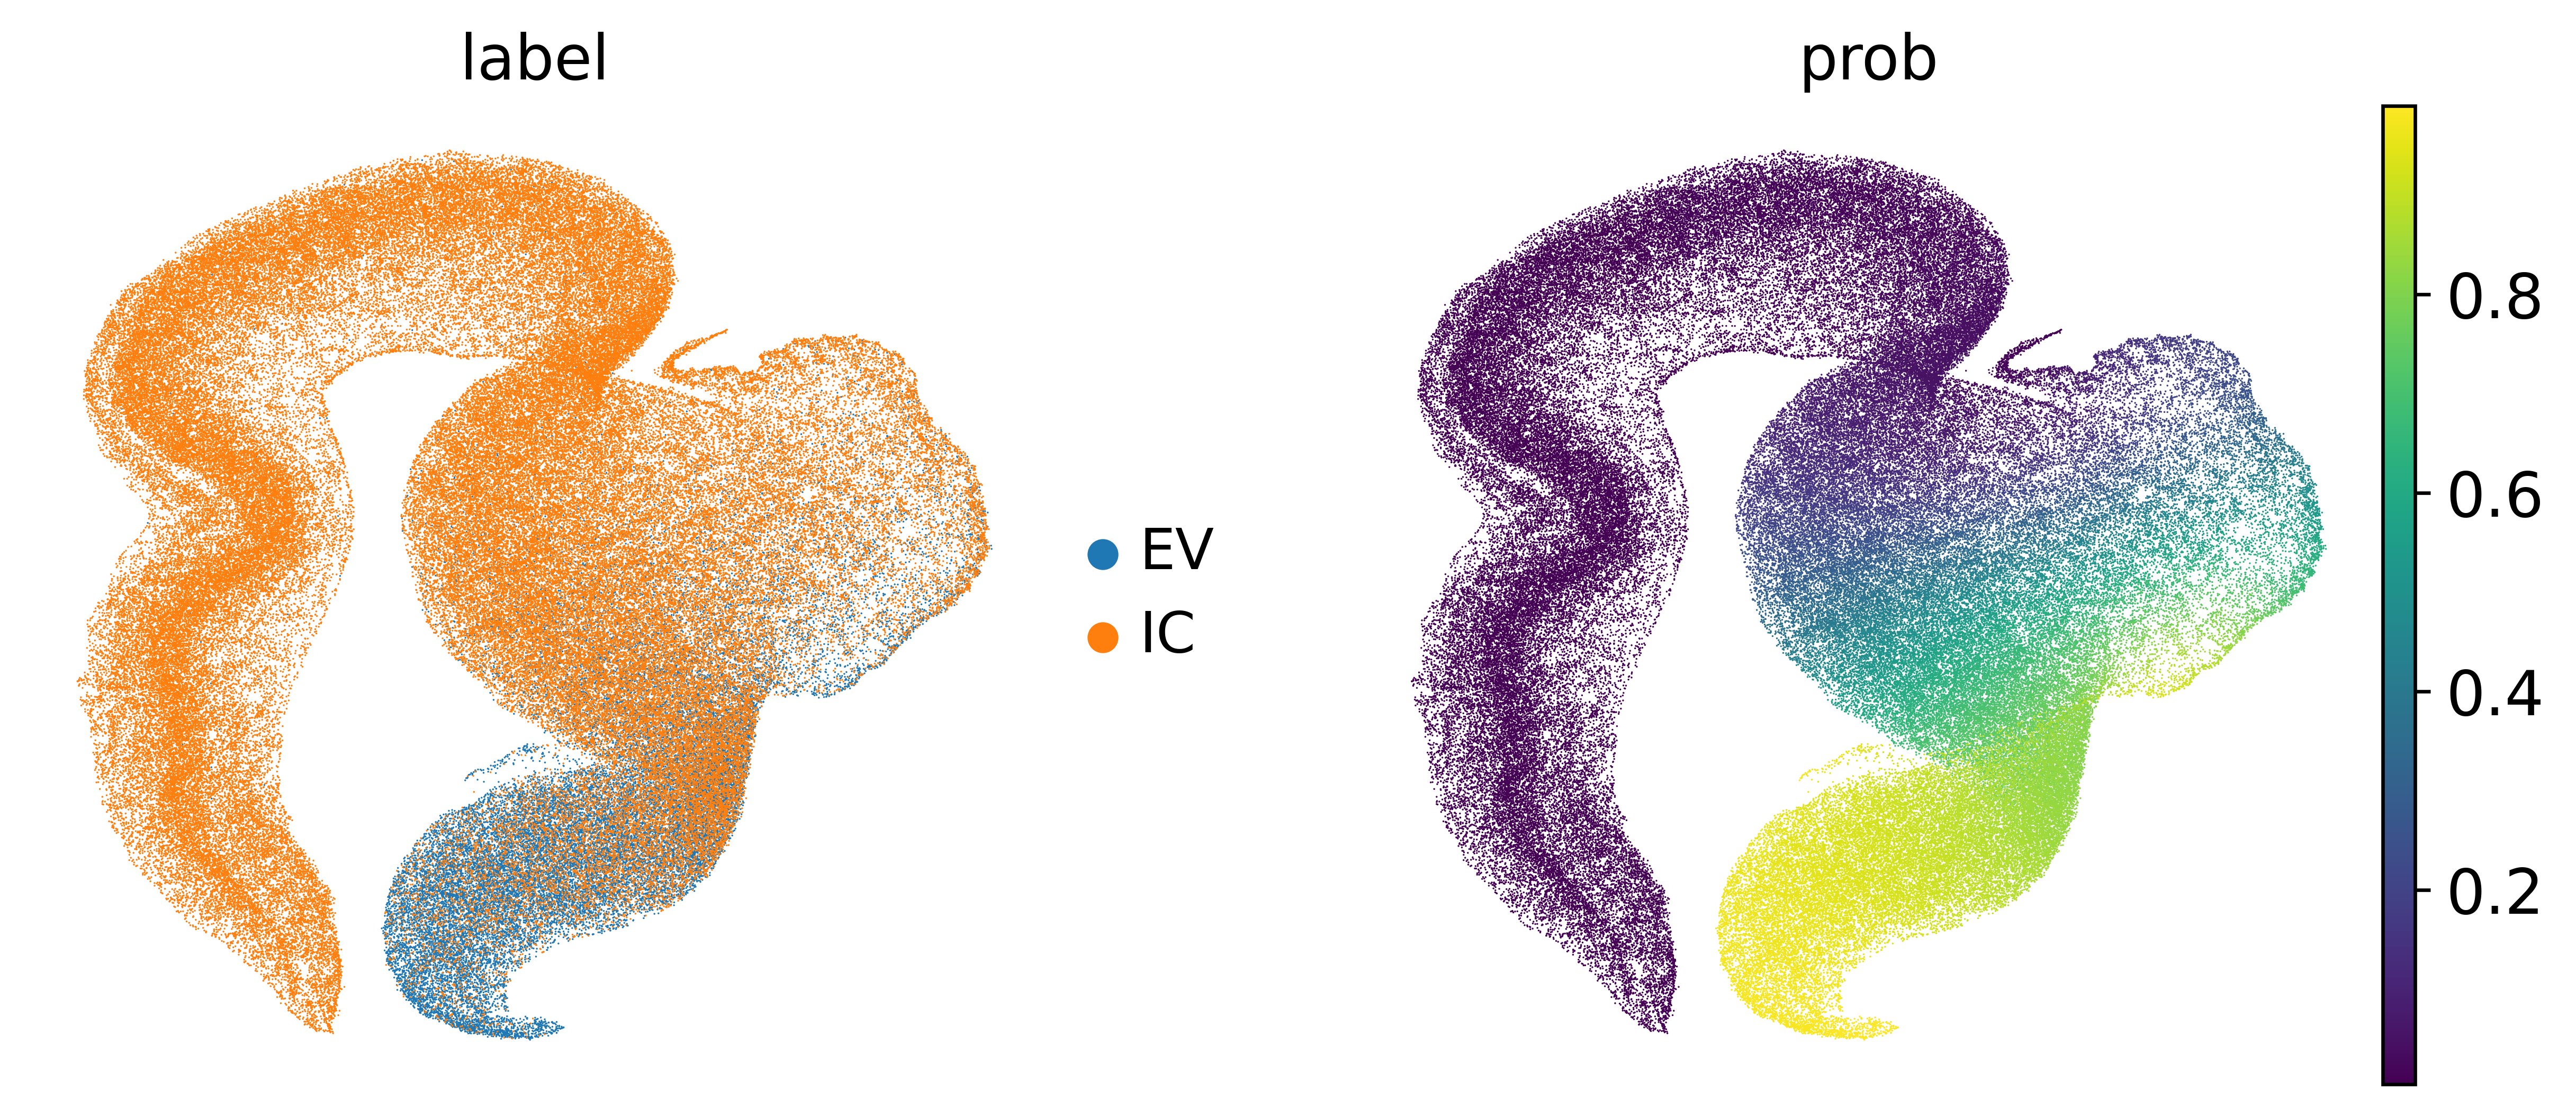

In [12]:
sc.pl.umap(emb_adata, color=['label', 'prob'], frameon=False)